# Assignment 5
In this assignment, you will estimate the exponent of the power law for more electrodes in R1111M. 
1. Select the first 50 electrodes and computes spectral power using Morlet wavelets for 30 frequencies between 3 and 150 Hz (np.logspace(np.log10(3), np.log10(150), num=30)) using buf = 1000 ms. 
2. Fit a regression of $\log(power) \sim \log(freq)$ for each electrode and obtain an estimate for $\alpha$, where $\alpha$ is the exponent in $ power \sim 1/freq^\alpha$.
3. Plot the distribution of $\alpha$ across these 50 electrodes. How consistent are the $\alpha$'s across these electrodes? 

In [1]:
# %matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn import linear_model
import mne
np.random.seed(100)

In [2]:
### Assignment 5 Solutions
from CMLLoad import CMLLoad

# Remember to update this to where your CMLExamples data is located.
load = CMLLoad('./CMLExamples')

# We load the dataframe for all sessions.
df = load.Index()

buf = 1000  #define the buffer (in ms) here. Should be at least half the total wavelet length at lowest frequency (i.e. 1/2f * n_cycles). With standard params, 1 sec usually suffices. 

# We load the dataframe for all sessions.
df = load.Index()

# Specify which subject and experiment we want
sub = 'R1111M'
exp = 'FR1'

# Select the dataframes for our subject and experiment.
df_select = df[(df['subject']==sub) & (df['experiment']==exp)]
# Pick the first session
df_sess = df_select.iloc[0]

# For first session...
evs = load.Load(df_sess, 'events')
word_evs = evs[evs['type']=='WORD']

# Load the EEG as an mne object.
eeg = load.LoadMNE(df_sess, ev_start=-buf, ev_len=buf+1000+buf)
# Select all word events.
eeg = eeg[word_evs.index]
# Select the 62nd electrode.
eeg = eeg.pick_channels(eeg.ch_names[:50])
sr = eeg.info['sfreq'] #we'll need this soon
# Pre-define an array of frequencies.
# We can log-space them since wavelets are less sensitive to differences at higher frequencies
myfreqs = np.logspace(np.log10(3), np.log10(150), num=30)
# Run TF decomposition
# We're setting it to automatically average across trials
power = mne.time_frequency.tfr_morlet(eeg, freqs=myfreqs, n_cycles=5, return_itc=False, average=True)


765 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


In [3]:
log_power = np.log10(power.data[:, :, int(buf/1000.*sr):-1*int(buf/1000.*sr)])
log_power = log_power.mean(axis = 2)
log_freqs = np.log10(power.freqs)

In [4]:
alpha_vec = []
for i in range(log_power.shape[0]):
    reg = linear_model.LinearRegression()
    model = reg.fit(log_freqs.reshape(len(log_freqs),1), log_power[i,:])
    b_est = model.coef_[0]
    alpha_vec.append(-b_est)

Text(0.5, 0, 'alpha')

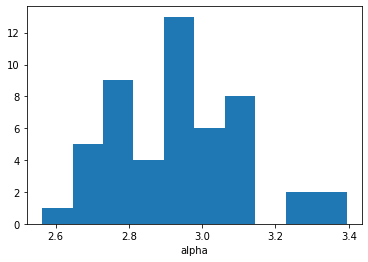

In [5]:
plt.hist(alpha_vec)
plt.xlabel('alpha')